In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Principal Component Analysis

> "By eye, it is clear that there is a nearly linear relationship between the x and y variables. This is reminiscent of the linear regression data we explored in In Depth: Linear Regression, but the problem setting here is slightly different: rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values.

> In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset."

> – Jake VanderPlas

PCA is a spectral decomposition method which solves for the eigenvectors (principal components) of the covariance matrix:

$${\displaystyle \Sigma _{ij}=\mathrm {cov} (X_{i},X_{j})=\mathrm {E} {\begin{bmatrix}(X_{i}-\mu _{i})(X_{j}-\mu _{j})\end{bmatrix}}=\mathrm {E} {\begin{bmatrix}X_{i}X_{j}\end{bmatrix}}-\mu _{i}\mu _{j}}$$

The matrix $\mathbf{R}$, where each column is an eigenvector of the covariance matrix, with associated eigenvalues $\lambda$ satisfies the condition

$$\mathbf{\Sigma} \propto \mathbf{X}^T \mathbf{X} = \mathbf{R} \mathbf{\Lambda} \mathbf{R}^T$$

where $\mathbf{\Lambda}$ is the diagonal matrix form of the eigenvalues.

PCA is a linear transformation which we can use to change the data $\mathbf{X}$ into an orthogonal coordinate system $\mathbf{T}$. 

$$\mathbf{T} = \mathbf{X} \mathbf{R}$$

The variance of this projected data is maximized by the first axis (principal component), and so on in descending order.

* PCA is a way to spread data out on "natural" axes. 
* Clusters in PCA space can be easier to work with, in particular when classifying noisey data.
* Axes may be hard to interpret directly

# References

1. https://en.wikipedia.org/wiki/Principal_component_analysis
1. https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

# Interactive Demos

1. http://setosa.io/ev/principal-component-analysis/
1. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues


# Obligatory Analysis of the Iris Dataset

No set of notes on PCA would be complete without the standard iris flower dataset. The data contains four properties or measurements:
1. Sepal length
1. Sepal width
1. Petal length
1. Petal width

for three species:
1. Setosa
1. Versicolor
1. Virginica
    

    
We'll load the data from `sklearn.datasets.load_iris`. The petal features are stored as `iris.data`, and the species labels as `iris.target`.

In [5]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [23]:
def plot_slice(X, tX, itX=None, axis_i=0, axis_j=1):
    """
    Define a helper function.
    """
    
    species = X.target
    n_plots = 2
    if itX is not None:
        n_plots = 3
    
    plt.figure(figsize=(4 * n_plots, 4))
    plt.subplot(1, n_plots, 1)
    plt.title('Data')
    plt.plot(X.data[species == 0, axis_i], X.data[species == 0, axis_j], "o", color='navy')
    plt.plot(X.data[species == 1, axis_i], X.data[species == 1, axis_j], "o", color='turquoise')
    plt.plot(X.data[species == 2, axis_i], X.data[species == 2, axis_j], "o", color='darkorange')
    plt.xlabel("$X_{" + str(axis_i + 1) + "}$")
    plt.ylabel("$X_{" + str(axis_j + 1) + "}$")
    
    plt.subplot(1, n_plots, 2)
    plt.title('PCA Transform')
    plt.plot(tX[species == 0, axis_i], tX[species == 0, axis_j], "o", color='navy')
    plt.plot(tX[species == 1, axis_i], tX[species == 1, axis_j], "o", color='turquoise')
    plt.plot(tX[species == 2, axis_i], tX[species == 2, axis_j], "o", color='darkorange')
    plt.xlabel("$PC_{" + str(axis_i + 1) + "}$")
    plt.ylabel("$PC_{" + str(axis_j + 1) + "}$")
    
    if itX is not None:
        plt.subplot(1, n_plots, 3)
        plt.title('PCA Inverse Transform')
        plt.plot(itX[species == 0, axis_i], itX[species == 0, axis_j], "o", color='navy')
        plt.plot(itX[species == 1, axis_i], itX[species == 1, axis_j], "o", color='turquoise')
        plt.plot(itX[species == 2, axis_i], itX[species == 2, axis_j], "o", color='darkorange')
        plt.xlabel("$X_{" + str(axis_i + 1) + "}$")
        plt.ylabel("$X_{" + str(axis_j + 1) + "}$")
    plt.show()

In [19]:
# Load Iris Data
iris = load_iris()

# PCA
pca = PCA(n_components=0.95).fit(iris.data)
print("PCA model fit: {:0.0f}% variance captured by {:d} principal components".format(100 * pca.n_components, pca.components_.shape[0]))

components = pca.transform(iris.data)
projected = pca.inverse_transform(components)

PCA model fit: 95% variance captured by 2 principal components


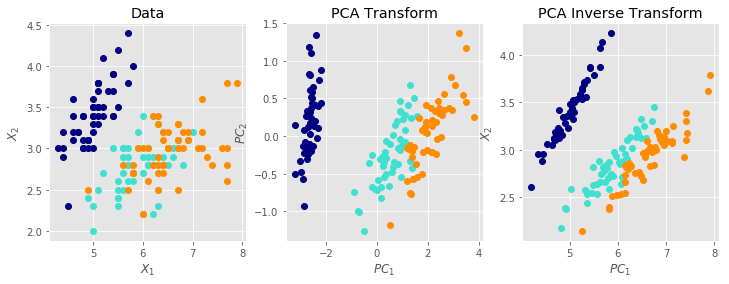

In [22]:
plot_slice(iris, components, projected, axis_i=0, axis_j=1)